# VISUALISATIONS AND EXPLORATORY DATA ANALYSIS

Loading data for EDA...
Data loaded successfully!

1. BASIC DATASET STATISTICS

Dataset Sizes:
  • BookNow Bookings: 68,336 rows
  • CinePOS Bookings: 1,641,966 rows
  • BookNow Visits (Target): 214,046 rows
  • Date Info: 547 rows
  • Theaters: 829

Date Range:
  • BookNow Bookings: 2023-01-01 19:00:00 to 2024-02-28 23:00:00
  • CinePOS Bookings: 2023-01-01 11:00:00 to 2024-02-28 23:00:00
  • Visits: 2023-01-01 00:00:00 to 2024-02-28 00:00:00

Unique Counts:
  • Unique Theaters: 826

Target Variable (Audience Count):
  • Mean: 41.62
  • Median: 34.00
  • Std Dev: 32.83
  • Min: 2
  • Max: 1350
  • 25th percentile: 18.00
  • 75th percentile: 58.00

2. TEMPORAL ANALYSIS


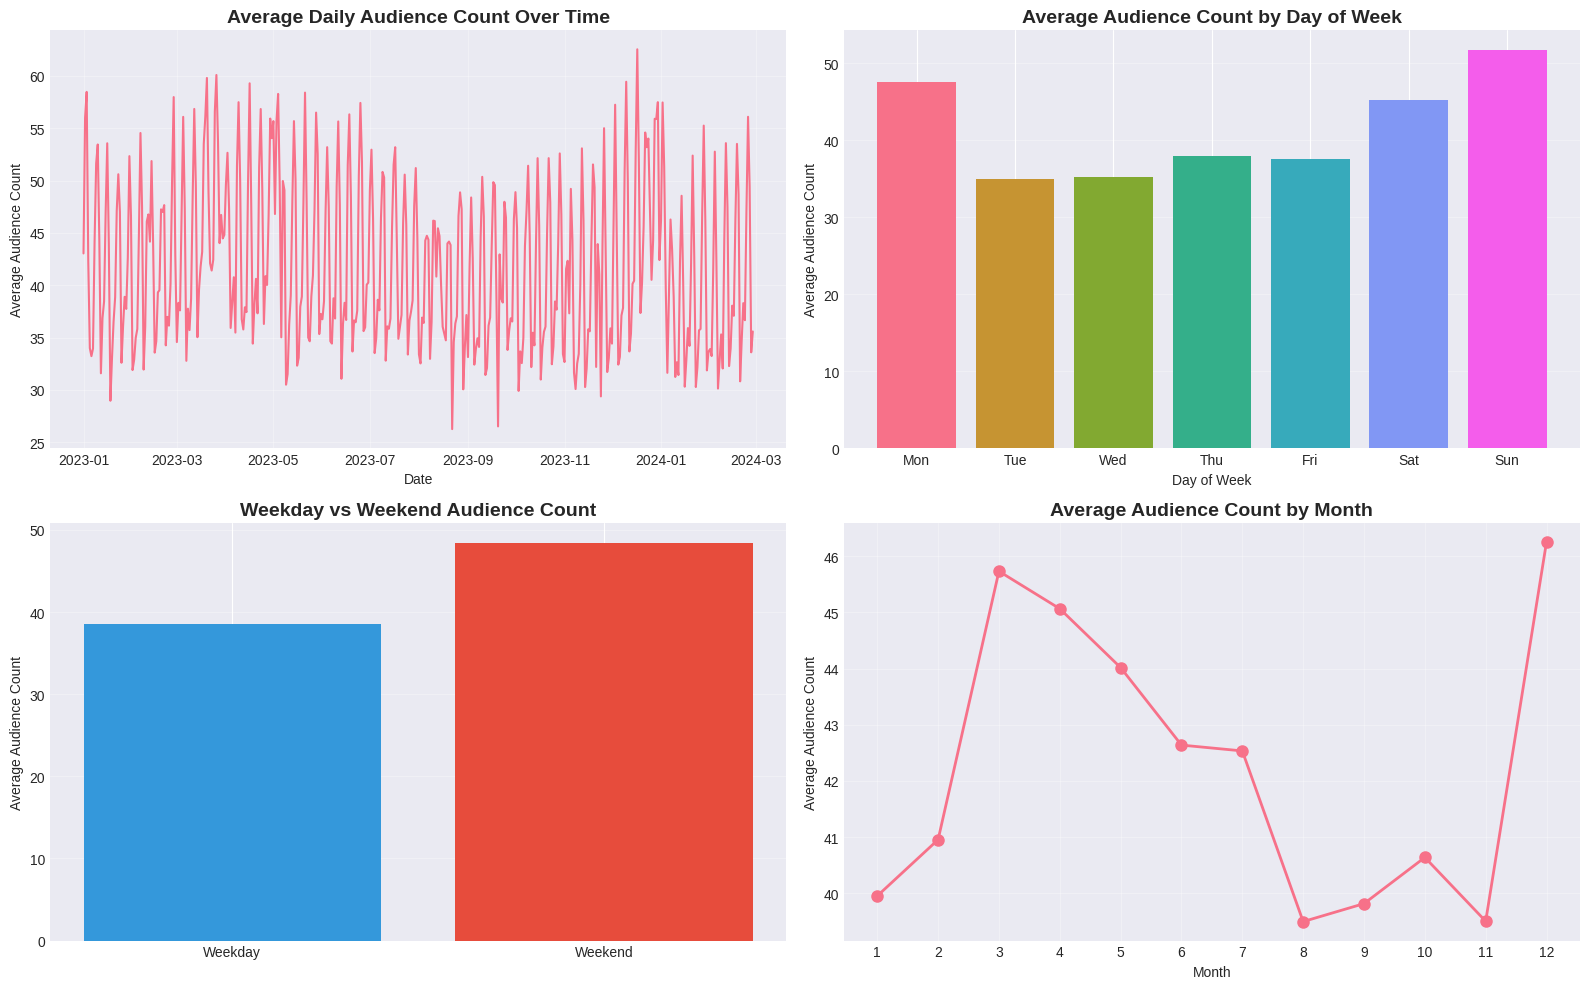


Key Temporal Insights:
  • Highest traffic day: Sunday (avg: 51.71)
  • Lowest traffic day: Tuesday (avg: 35.04)
  • Weekend avg: 48.44
  • Weekday avg: 38.51
  • Weekend lift: 25.8%
  • Peak month: Month 12 (avg: 46.26)
  • Lowest month: Month 8 (avg: 39.50)

3. THEATER ANALYSIS


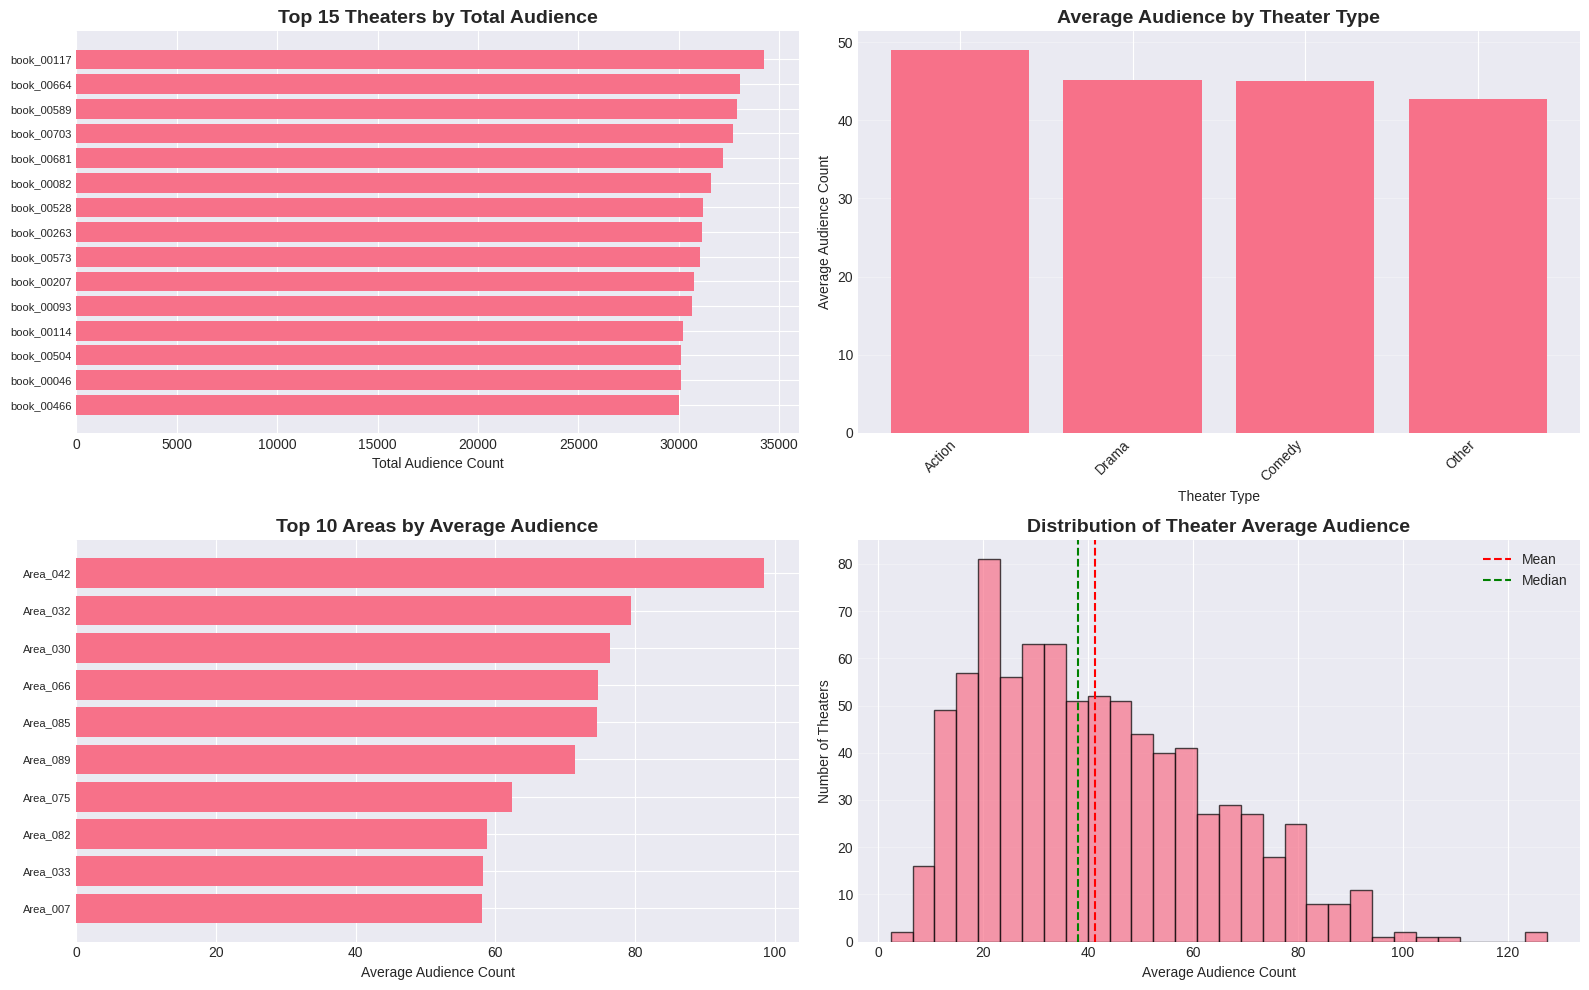


Key Theater Insights:
  • Total unique theaters: 826
  • Average audience per theater: 41.38
  • Top performing theater: book_00117 (total: 34256)
  • Most consistent theater (lowest std): book_00409
  • Best performing theater type: Action (avg: 48.93)

4. BOOKING ANALYSIS


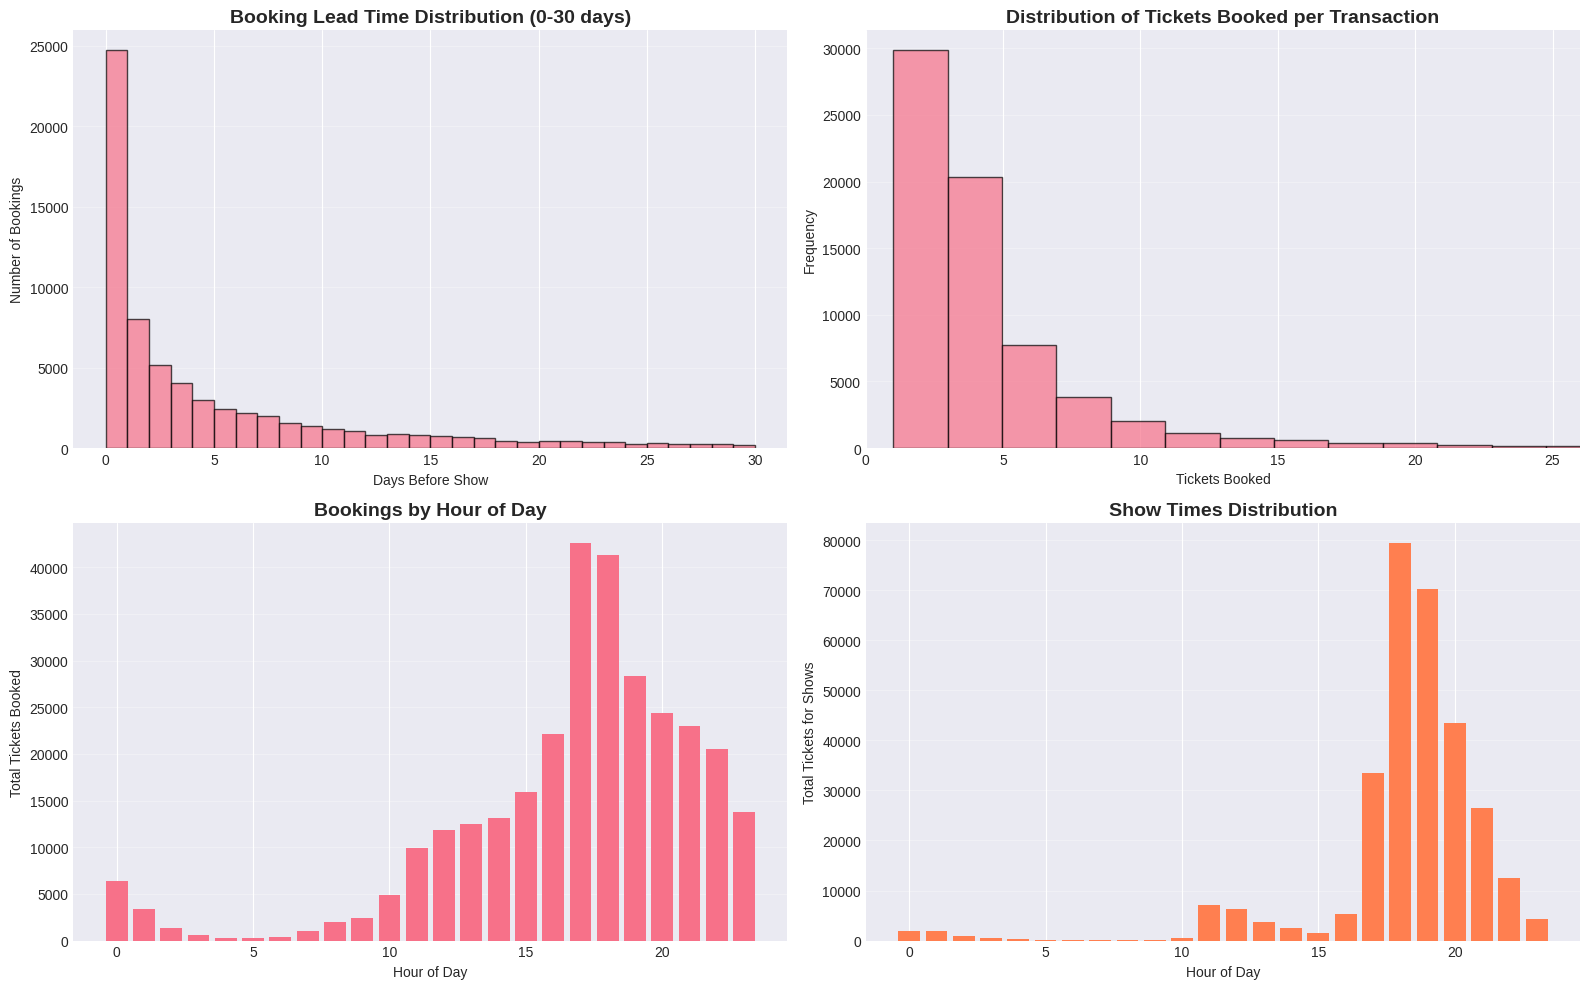


Key Booking Insights:
  • Average lead time: 9.08 days
  • Median lead time: 2.08 days
  • Average tickets per booking: 4.43
  • Peak booking hour: 17:00
  • Most popular show time: 18:00
  • Total BookNow tickets: 302,442
  • Total CinePOS tickets: 8,189,051

5. CORRELATION ANALYSIS
Processed data not found. Run data preparation first!

6. TARGET VARIABLE ANALYSIS


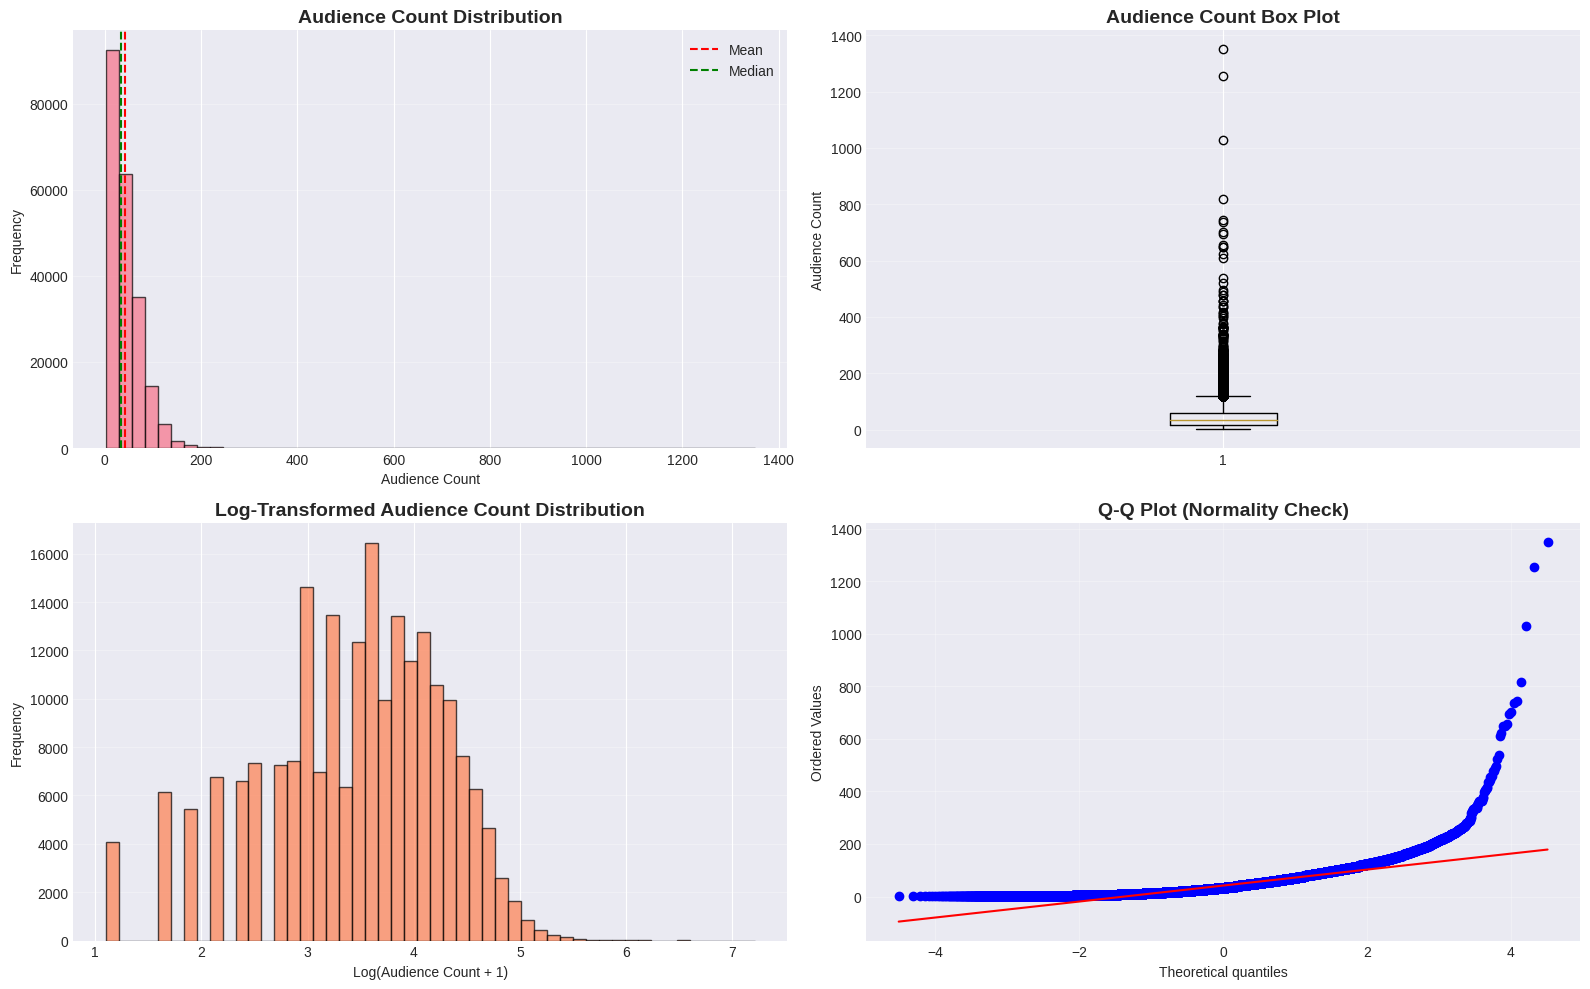


Distribution Metrics:
  • Skewness: 2.603
  • Kurtosis: 37.345
  • Coefficient of Variation: 0.789
  • Outliers detected: 5589 (2.61%)

EDA COMPLETE! All visualizations saved.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class CinemaEDA:
    def __init__(self, data_dir):
        self.data_dir = Path(data_dir)
        
    def load_data(self):
        """Load all data files"""
        print("Loading data for EDA...")
        self.booknow_booking = pd.read_csv(self.data_dir / 'booknow_booking/booknow_booking.csv')
        self.cinepos_booking = pd.read_csv(self.data_dir / 'cinePOS_booking/cinePOS_booking.csv')
        self.booknow_theaters = pd.read_csv(self.data_dir / 'booknow_theaters/booknow_theaters.csv')
        self.cinepos_theaters = pd.read_csv(self.data_dir / 'cinePOS_theaters/cinePOS_theaters.csv')
        self.booknow_visits = pd.read_csv(self.data_dir / 'booknow_visits/booknow_visits.csv')
        self.date_info = pd.read_csv(self.data_dir / 'date_info/date_info.csv')
        self.movie_theater_relation = pd.read_csv(self.data_dir / 'movie_theater_id_relation/movie_theater_id_relation.csv')
        
        # Convert dates
        self.booknow_booking['show_datetime'] = pd.to_datetime(self.booknow_booking['show_datetime'])
        self.cinepos_booking['show_datetime'] = pd.to_datetime(self.cinepos_booking['show_datetime'])
        self.booknow_visits['show_date'] = pd.to_datetime(self.booknow_visits['show_date'])
        self.date_info['show_date'] = pd.to_datetime(self.date_info['show_date'])
        
        print("Data loaded successfully!")
        
    def basic_statistics(self):
        """Display basic statistics about the datasets"""
        print("\n" + "="*70)
        print("1. BASIC DATASET STATISTICS")
        print("="*70)
        
        print(f"\nDataset Sizes:")
        print(f"  • BookNow Bookings: {len(self.booknow_booking):,} rows")
        print(f"  • CinePOS Bookings: {len(self.cinepos_booking):,} rows")
        print(f"  • BookNow Visits (Target): {len(self.booknow_visits):,} rows")
        print(f"  • Date Info: {len(self.date_info):,} rows")
        print(f"  • Theaters: {len(self.booknow_theaters):,}")
        
        print(f"\nDate Range:")
        print(f"  • BookNow Bookings: {self.booknow_booking['show_datetime'].min()} to {self.booknow_booking['show_datetime'].max()}")
        print(f"  • CinePOS Bookings: {self.cinepos_booking['show_datetime'].min()} to {self.cinepos_booking['show_datetime'].max()}")
        print(f"  • Visits: {self.booknow_visits['show_date'].min()} to {self.booknow_visits['show_date'].max()}")
        
        print(f"\nUnique Counts:")
        print(f"  • Unique Theaters: {self.booknow_visits['book_theater_id'].nunique()}")
        
        print(f"\nTarget Variable (Audience Count):")
        print(f"  • Mean: {self.booknow_visits['audience_count'].mean():.2f}")
        print(f"  • Median: {self.booknow_visits['audience_count'].median():.2f}")
        print(f"  • Std Dev: {self.booknow_visits['audience_count'].std():.2f}")
        print(f"  • Min: {self.booknow_visits['audience_count'].min()}")
        print(f"  • Max: {self.booknow_visits['audience_count'].max()}")
        print(f"  • 25th percentile: {self.booknow_visits['audience_count'].quantile(0.25):.2f}")
        print(f"  • 75th percentile: {self.booknow_visits['audience_count'].quantile(0.75):.2f}")
        
    def temporal_analysis(self):
        """Analyze temporal patterns"""
        print("\n" + "="*70)
        print("2. TEMPORAL ANALYSIS")
        print("="*70)
        
        # Add temporal features
        visits_temp = self.booknow_visits.copy()
        visits_temp['year'] = visits_temp['show_date'].dt.year
        visits_temp['month'] = visits_temp['show_date'].dt.month
        visits_temp['day_of_week'] = visits_temp['show_date'].dt.day_name()
        visits_temp['is_weekend'] = visits_temp['show_date'].dt.dayofweek.isin([5, 6])
        
        # Plot 1: Daily trend
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Daily audience count
        daily_avg = visits_temp.groupby('show_date')['audience_count'].mean().reset_index()
        axes[0, 0].plot(daily_avg['show_date'], daily_avg['audience_count'], linewidth=1.5)
        axes[0, 0].set_title('Average Daily Audience Count Over Time', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Average Audience Count')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Day of week analysis
        dow_avg = visits_temp.groupby('day_of_week')['audience_count'].mean().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])
        axes[0, 1].bar(range(7), dow_avg.values, color=sns.color_palette("husl", 7))
        axes[0, 1].set_title('Average Audience Count by Day of Week', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Day of Week')
        axes[0, 1].set_ylabel('Average Audience Count')
        axes[0, 1].set_xticks(range(7))
        axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Weekend vs Weekday
        weekend_comparison = visits_temp.groupby('is_weekend')['audience_count'].mean()
        axes[1, 0].bar(['Weekday', 'Weekend'], weekend_comparison.values, color=['#3498db', '#e74c3c'])
        axes[1, 0].set_title('Weekday vs Weekend Audience Count', fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('Average Audience Count')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Monthly trend
        monthly_avg = visits_temp.groupby('month')['audience_count'].mean()
        axes[1, 1].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
        axes[1, 1].set_title('Average Audience Count by Month', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel('Average Audience Count')
        axes[1, 1].set_xticks(range(1, 13))
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        # plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\nKey Temporal Insights:")
        print(f"  • Highest traffic day: {dow_avg.idxmax()} (avg: {dow_avg.max():.2f})")
        print(f"  • Lowest traffic day: {dow_avg.idxmin()} (avg: {dow_avg.min():.2f})")
        print(f"  • Weekend avg: {weekend_comparison[True]:.2f}")
        print(f"  • Weekday avg: {weekend_comparison[False]:.2f}")
        print(f"  • Weekend lift: {((weekend_comparison[True]/weekend_comparison[False]-1)*100):.1f}%")
        print(f"  • Peak month: Month {monthly_avg.idxmax()} (avg: {monthly_avg.max():.2f})")
        print(f"  • Lowest month: Month {monthly_avg.idxmin()} (avg: {monthly_avg.min():.2f})")
        
    def theater_analysis(self):
        """Analyze theater-level patterns"""
        print("\n" + "="*70)
        print("3. THEATER ANALYSIS")
        print("="*70)
        
        # Theater performance
        theater_stats = self.booknow_visits.groupby('book_theater_id').agg({
            'audience_count': ['mean', 'sum', 'count', 'std']
        }).reset_index()
        theater_stats.columns = ['theater_id', 'avg_audience', 'total_audience', 'num_shows', 'std_audience']
        theater_stats = theater_stats.sort_values('total_audience', ascending=False)
        
        # Merge with theater info
        theater_stats = theater_stats.merge(self.booknow_theaters, left_on='theater_id', right_on='book_theater_id', how='left')
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Top 15 theaters by total audience
        top_theaters = theater_stats.head(15)
        axes[0, 0].barh(range(15), top_theaters['total_audience'].values)
        axes[0, 0].set_yticks(range(15))
        axes[0, 0].set_yticklabels(top_theaters['theater_id'].values, fontsize=8)
        axes[0, 0].set_title('Top 15 Theaters by Total Audience', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Total Audience Count')
        axes[0, 0].invert_yaxis()
        
        # Theater type analysis
        if 'theater_type' in theater_stats.columns:
            type_avg = theater_stats.groupby('theater_type')['avg_audience'].mean().sort_values(ascending=False)
            axes[0, 1].bar(range(len(type_avg)), type_avg.values)
            axes[0, 1].set_title('Average Audience by Theater Type', fontsize=14, fontweight='bold')
            axes[0, 1].set_xlabel('Theater Type')
            axes[0, 1].set_ylabel('Average Audience Count')
            axes[0, 1].set_xticks(range(len(type_avg)))
            axes[0, 1].set_xticklabels(type_avg.index, rotation=45, ha='right')
            axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Theater area analysis
        if 'theater_area' in theater_stats.columns:
            area_avg = theater_stats.groupby('theater_area')['avg_audience'].mean().sort_values(ascending=False).head(10)
            axes[1, 0].barh(range(len(area_avg)), area_avg.values)
            axes[1, 0].set_yticks(range(len(area_avg)))
            axes[1, 0].set_yticklabels(area_avg.index, fontsize=8)
            axes[1, 0].set_title('Top 10 Areas by Average Audience', fontsize=14, fontweight='bold')
            axes[1, 0].set_xlabel('Average Audience Count')
            axes[1, 0].invert_yaxis()
        
        # Distribution of average audience per theater
        axes[1, 1].hist(theater_stats['avg_audience'], bins=30, edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Distribution of Theater Average Audience', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Average Audience Count')
        axes[1, 1].set_ylabel('Number of Theaters')
        axes[1, 1].axvline(theater_stats['avg_audience'].mean(), color='red', linestyle='--', label='Mean')
        axes[1, 1].axvline(theater_stats['avg_audience'].median(), color='green', linestyle='--', label='Median')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        # plt.savefig('theater_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\nKey Theater Insights:")
        print(f"  • Total unique theaters: {len(theater_stats)}")
        print(f"  • Average audience per theater: {theater_stats['avg_audience'].mean():.2f}")
        print(f"  • Top performing theater: {theater_stats.iloc[0]['theater_id']} (total: {theater_stats.iloc[0]['total_audience']:.0f})")
        print(f"  • Most consistent theater (lowest std): {theater_stats.nsmallest(1, 'std_audience')['theater_id'].values[0]}")
        if 'theater_type' in theater_stats.columns:
            print(f"  • Best performing theater type: {type_avg.index[0]} (avg: {type_avg.values[0]:.2f})")
        
    def booking_analysis(self):
        """Analyze booking patterns"""
        print("\n" + "="*70)
        print("4. BOOKING ANALYSIS")
        print("="*70)
        
        # Booking lead time (days between booking and show)
        booknow_temp = self.booknow_booking.copy()
        booknow_temp['booking_datetime'] = pd.to_datetime(booknow_temp['booking_datetime'])
        booknow_temp['lead_time'] = (booknow_temp['show_datetime'] - booknow_temp['booking_datetime']).dt.total_seconds() / 86400
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Lead time distribution
        lead_time_filtered = booknow_temp[booknow_temp['lead_time'].between(0, 30)]
        axes[0, 0].hist(lead_time_filtered['lead_time'], bins=30, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Booking Lead Time Distribution (0-30 days)', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Days Before Show')
        axes[0, 0].set_ylabel('Number of Bookings')
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Tickets booked distribution
        axes[0, 1].hist(self.booknow_booking['tickets_booked'], bins=50, edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Distribution of Tickets Booked per Transaction', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Tickets Booked')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_xlim(0, self.booknow_booking['tickets_booked'].quantile(0.99))
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Booking time of day
        booknow_temp['booking_hour'] = booknow_temp['booking_datetime'].dt.hour
        hourly_bookings = booknow_temp.groupby('booking_hour')['tickets_booked'].sum()
        axes[1, 0].bar(hourly_bookings.index, hourly_bookings.values)
        axes[1, 0].set_title('Bookings by Hour of Day', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Hour of Day')
        axes[1, 0].set_ylabel('Total Tickets Booked')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Show time distribution
        booknow_temp['show_hour'] = booknow_temp['show_datetime'].dt.hour
        show_hourly = booknow_temp.groupby('show_hour')['tickets_booked'].sum()
        axes[1, 1].bar(show_hourly.index, show_hourly.values, color='coral')
        axes[1, 1].set_title('Show Times Distribution', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Hour of Day')
        axes[1, 1].set_ylabel('Total Tickets for Shows')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        # plt.savefig('booking_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\nKey Booking Insights:")
        print(f"  • Average lead time: {booknow_temp['lead_time'].mean():.2f} days")
        print(f"  • Median lead time: {booknow_temp['lead_time'].median():.2f} days")
        print(f"  • Average tickets per booking: {self.booknow_booking['tickets_booked'].mean():.2f}")
        print(f"  • Peak booking hour: {hourly_bookings.idxmax()}:00")
        print(f"  • Most popular show time: {show_hourly.idxmax()}:00")
        print(f"  • Total BookNow tickets: {self.booknow_booking['tickets_booked'].sum():,}")
        print(f"  • Total CinePOS tickets: {self.cinepos_booking['tickets_sold'].sum():,}")
        
    def correlation_analysis(self):
        """Analyze correlations between features and target"""
        print("\n" + "="*70)
        print("5. CORRELATION ANALYSIS")
        print("="*70)
        
        # Load processed data if available
        try:
            processed_data = pd.read_csv('processed_training_data.csv')
            
            # Select numerical columns
            numerical_cols = processed_data.select_dtypes(include=[np.number]).columns
            correlation_target = processed_data[numerical_cols].corr()['audience_count'].sort_values(ascending=False)
            
            # Plot top correlations
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            
            # Top positive correlations
            top_corr = correlation_target[1:16]  # Exclude self-correlation
            axes[0].barh(range(len(top_corr)), top_corr.values)
            axes[0].set_yticks(range(len(top_corr)))
            axes[0].set_yticklabels(top_corr.index, fontsize=9)
            axes[0].set_title('Top 15 Features Correlated with Audience Count', fontsize=14, fontweight='bold')
            axes[0].set_xlabel('Correlation Coefficient')
            axes[0].invert_yaxis()
            axes[0].grid(True, alpha=0.3, axis='x')
            
            # Correlation heatmap (top features)
            top_features = correlation_target[1:11].index.tolist() + ['audience_count']
            corr_matrix = processed_data[top_features].corr()
            
            sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                       square=True, ax=axes[1], cbar_kws={'shrink': 0.8})
            axes[1].set_title('Correlation Heatmap (Top Features)', fontsize=14, fontweight='bold')
            
            plt.tight_layout()
            # plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print("\nKey Correlation Insights:")
            print(f"  • Strongest positive correlation: {correlation_target.index[1]} ({correlation_target.values[1]:.3f})")
            print(f"  • Top 5 correlated features:")
            for i, (feature, corr) in enumerate(correlation_target[1:6].items(), 1):
                print(f"    {i}. {feature}: {corr:.3f}")
                
        except FileNotFoundError:
            print("Processed data not found. Run data preparation first!")
    
    def target_distribution(self):
        """Analyze target variable distribution"""
        print("\n" + "="*70)
        print("6. TARGET VARIABLE ANALYSIS")
        print("="*70)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Distribution
        axes[0, 0].hist(self.booknow_visits['audience_count'], bins=50, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Audience Count Distribution', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Audience Count')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].axvline(self.booknow_visits['audience_count'].mean(), color='red', linestyle='--', label='Mean')
        axes[0, 0].axvline(self.booknow_visits['audience_count'].median(), color='green', linestyle='--', label='Median')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Box plot
        axes[0, 1].boxplot(self.booknow_visits['audience_count'])
        axes[0, 1].set_title('Audience Count Box Plot', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Audience Count')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Log distribution
        axes[1, 0].hist(np.log1p(self.booknow_visits['audience_count']), bins=50, edgecolor='black', alpha=0.7, color='coral')
        axes[1, 0].set_title('Log-Transformed Audience Count Distribution', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Log(Audience Count + 1)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Q-Q plot
        from scipy import stats
        stats.probplot(self.booknow_visits['audience_count'], dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        # plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Skewness and kurtosis
        from scipy.stats import skew, kurtosis
        print("\nDistribution Metrics:")
        print(f"  • Skewness: {skew(self.booknow_visits['audience_count']):.3f}")
        print(f"  • Kurtosis: {kurtosis(self.booknow_visits['audience_count']):.3f}")
        print(f"  • Coefficient of Variation: {(self.booknow_visits['audience_count'].std() / self.booknow_visits['audience_count'].mean()):.3f}")
        
        # Check for outliers
        Q1 = self.booknow_visits['audience_count'].quantile(0.25)
        Q3 = self.booknow_visits['audience_count'].quantile(0.75)
        IQR = Q3 - Q1
        outliers = self.booknow_visits[(self.booknow_visits['audience_count'] < Q1 - 1.5 * IQR) | 
                                        (self.booknow_visits['audience_count'] > Q3 + 1.5 * IQR)]
        print(f"  • Outliers detected: {len(outliers)} ({len(outliers)/len(self.booknow_visits)*100:.2f}%)")
    
    def run_complete_eda(self):
        """Run all EDA analyses"""
        self.load_data()
        self.basic_statistics()
        self.temporal_analysis()
        self.theater_analysis()
        self.booking_analysis()
        self.correlation_analysis()
        self.target_distribution()
        
        print("\n" + "="*70)
        print("EDA COMPLETE! All visualizations saved.")
        print("="*70)

# Run EDA
if __name__ == "__main__":
    eda = CinemaEDA(r'/kaggle/input/Cinema_Audience_Forecasting_challenge')
    eda.run_complete_eda()

# MODEL SELECTION BASED ON EDA
## 1. XGBoost (Extreme Gradient Boosting) - PRIMARY CHOICE
* Faster than XGBoost with large datasets
* Better handling of categorical features (theater_type, theater_area)
* Memory efficient
* Excellent for time-series forecasting
* Handles high cardinality categorical variables well

## 2. LightGBM (Light Gradient Boosting Machine) - SPEED + ACCURACY
* Excellent for time-series features (lag features, rolling statistics)
* Handles mixed data types (numerical + encoded categorical)
* Robust to outliers (which you have in audience counts)
* Fast training and prediction

## 3. Random Forest Regressor - ENSEMBLE BASELINE
Why:

* Robust and stable baseline model
* Less prone to overfitting than single decision trees
* Provides feature importance rankings
* Works well with non-linear relationships
* No extensive hyperparameter tuning needed initially


## Why NOT Other Models?
* Linear Regression: Won't capture non-linear temporal patterns
* Neural Networks: Overkill for this size, needs more data
* ARIMA/Prophet: Limited to single time series, doesn't leverage theater features
* SVR: Slow with large datasets, poor scalability

# MODEL SELECTION
## Since Feature engneering with XGBoost + CatBoost models are the most accurate and with less error, it can be used
> Submission path: '/kaggle/working/submission.csv'

# MODEL BUILDING AND HYPER-PARAMETER TUNING

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
import os

warnings.filterwarnings('ignore')

# Define paths (Fixed for local environment)
BASE_DIR = r"/kaggle/input/Cinema_Audience_Forecasting_challenge"
TRAIN_PATH = os.path.join(BASE_DIR, r"booknow_visits/booknow_visits.csv")
THEATER_PATH = os.path.join(BASE_DIR, r"booknow_theaters/booknow_theaters.csv")
SUBMISSION_PATH = os.path.join(BASE_DIR, r"sample_submission/sample_submission.csv")
CINEPOS_PATH = os.path.join(BASE_DIR, r"cinePOS_booking/cinePOS_booking.csv")
RELATION_PATH = os.path.join(BASE_DIR, r"movie_theater_id_relation/movie_theater_id_relation.csv")

print("Loading datasets...")
train_df = pd.read_csv(TRAIN_PATH)
theater_df = pd.read_csv(THEATER_PATH)
submission_df = pd.read_csv(SUBMISSION_PATH)
cinepos_df = pd.read_csv(CINEPOS_PATH)
relation_df = pd.read_csv(RELATION_PATH)

# Parse submission IDs
submission_df['show_date'] = pd.to_datetime(submission_df['ID'].str[-10:])
submission_df['book_theater_id'] = submission_df['ID'].str[:-11]

# Convert dates
train_df['show_date'] = pd.to_datetime(train_df['show_date'])

def create_date_features(df):
    """Enhanced date features"""
    df['year'] = df['show_date'].dt.year
    df['month'] = df['show_date'].dt.month
    df['day'] = df['show_date'].dt.day
    df['day_of_week'] = df['show_date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['week_of_year'] = df['show_date'].dt.isocalendar().week
    df['day_of_year'] = df['show_date'].dt.dayofyear
    
    # NEW: Month start/end features
    df['is_month_start'] = (df['day'] <= 5).astype(int)
    df['is_month_end'] = (df['day'] >= 25).astype(int)
    
    # NEW: Weekend proximity
    df['days_to_weekend'] = df['day_of_week'].apply(lambda x: (5-x) if x < 5 else 0)
    
    # Cyclical encoding
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    
    # Indian holidays
    holidays = pd.to_datetime([
        '2023-01-26', '2023-03-08', '2023-04-07', '2023-04-22', '2023-08-15', 
        '2023-10-02', '2023-10-24', '2023-11-12', '2023-11-27', '2023-12-25',
        '2024-01-26', '2024-03-08', '2024-03-25', '2024-03-29', '2024-04-11',
        '2024-04-17', '2024-04-21', '2024-08-15', '2024-10-02', '2024-10-12',
        '2024-10-31', '2024-11-01', '2024-12-25'
    ])
    df['is_holiday'] = df['show_date'].isin(holidays).astype(int)
    
    # Holiday proximity
    df['days_to_holiday'] = 999
    df['days_from_holiday'] = 999
    for holiday in holidays:
        days_diff = (df['show_date'] - holiday).dt.days
        df['days_to_holiday'] = np.minimum(df['days_to_holiday'], np.abs(days_diff))
        df.loc[days_diff < 0, 'days_from_holiday'] = np.minimum(
            df.loc[days_diff < 0, 'days_from_holiday'], 
            np.abs(days_diff[days_diff < 0])
        )
        df.loc[days_diff >= 0, 'days_to_holiday'] = np.minimum(
            df.loc[days_diff >= 0, 'days_to_holiday'],
            days_diff[days_diff >= 0]
        )
    
    df['near_holiday'] = (df['days_to_holiday'] <= 3).astype(int)
    
    # IPL Season
    ipl_mask = (
        ((df['show_date'] >= '2023-03-31') & (df['show_date'] <= '2023-05-29')) |
        ((df['show_date'] >= '2024-03-22') & (df['show_date'] <= '2024-05-26'))
    )
    df['is_ipl'] = ipl_mask.astype(int)
    
    # School periods
    df['is_exam_month'] = df['month'].isin([3, 10]).astype(int)
    df['is_vacation_month'] = df['month'].isin([5, 6, 12]).astype(int)
    
    # NEW: Seasonal patterns
    df['is_summer'] = df['month'].isin([4, 5, 6]).astype(int)
    df['is_festive_season'] = df['month'].isin([10, 11, 12]).astype(int)
    
    return df

# Process CinePOS
print("Processing CinePOS data...")
cinepos_df = cinepos_df.merge(relation_df, on='cine_theater_id', how='inner')
cinepos_df['show_datetime'] = pd.to_datetime(cinepos_df['show_datetime'])
cinepos_df['show_date'] = cinepos_df['show_datetime'].dt.date
cinepos_df['show_date'] = pd.to_datetime(cinepos_df['show_date'])

# Aggregate CinePOS by theater and date
cine_daily = cinepos_df.groupby(['book_theater_id', 'show_date'])['tickets_sold'].sum().reset_index()

# NEW: Better CinePOS aggregations
cine_stats = cine_daily.groupby('book_theater_id')['tickets_sold'].agg([
    'mean', 'std', 'max', 'min'
]).reset_index()
cine_stats.columns = ['book_theater_id', 'cine_mean', 'cine_std', 'cine_max', 'cine_min']

# Recent mean (last 30 days)
cine_recent = cine_daily.sort_values('show_date').groupby('book_theater_id')['tickets_sold'].apply(
    lambda x: x.tail(30).mean()
).reset_index()
cine_recent.columns = ['book_theater_id', 'cine_recent_mean']

cine_stats = cine_stats.merge(cine_recent, on='book_theater_id', how='left')

# Merge datasets
print("Merging theater data...")
train_df = train_df.merge(theater_df, on='book_theater_id', how='left')
submission_df = submission_df.merge(theater_df, on='book_theater_id', how='left')

# Merge CinePOS stats
train_df = train_df.merge(cine_stats, on='book_theater_id', how='left')
submission_df = submission_df.merge(cine_stats, on='book_theater_id', how='left')

# Create date features
train_df = create_date_features(train_df)
submission_df = create_date_features(submission_df)

# Create time-based historical features (NO DATA LEAKAGE)
print("Creating historical features...")

# Sort by date for proper lag features
train_df = train_df.sort_values('show_date').reset_index(drop=True)

# NEW: Expanded lag features (1, 2, 3, 7, 14, 28, 35, 42 days)
def create_expanding_features(df, group_col, target_col, lags=[1, 2, 3, 7, 14, 28, 35, 42]):
    """Create expanding window features without data leakage"""
    result_df = df.copy()
    
    for lag in lags:
        # Lagged values
        result_df[f'{target_col}_lag_{lag}'] = df.groupby(group_col)[target_col].shift(lag)
        
        # Rolling means (using only past data)
        if lag >= 7:  # Only for longer windows
            result_df[f'{target_col}_roll_mean_{lag}'] = (
                df.groupby(group_col)[target_col]
                .shift(1)
                .rolling(window=lag, min_periods=1)
                .mean()
                .reset_index(level=0, drop=True)
            )
    
    return result_df

# Create lag features for training data
train_df = create_expanding_features(train_df, 'book_theater_id', 'audience_count')

# Theater historical stats (computed only on data BEFORE each date)
theater_stats = []
for theater_id in train_df['book_theater_id'].unique():
    theater_data = train_df[train_df['book_theater_id'] == theater_id].sort_values('show_date')
    
    # Expanding statistics
    theater_data['theater_expanding_mean'] = theater_data['audience_count'].expanding().mean().shift(1)
    theater_data['theater_expanding_std'] = theater_data['audience_count'].expanding().std().shift(1)
    
    # NEW: Theater trend (recent vs older)
    recent_mean = theater_data['audience_count'].shift(1).rolling(7, min_periods=1).mean()
    older_mean = theater_data['audience_count'].shift(8).rolling(7, min_periods=1).mean()
    theater_data['theater_recent_trend'] = recent_mean / (older_mean + 1)
    
    theater_stats.append(theater_data)

train_df = pd.concat(theater_stats, ignore_index=True)

# Day of week patterns (computed from past only)
dow_patterns = {}
for theater_id in train_df['book_theater_id'].unique():
    theater_data = train_df[train_df['book_theater_id'] == theater_id]
    for dow in range(7):
        dow_data = theater_data[theater_data['day_of_week'] == dow]['audience_count']
        if len(dow_data) > 0:
            dow_patterns[(theater_id, dow)] = dow_data.mean()

train_df['theater_dow_pattern'] = train_df.apply(
    lambda x: dow_patterns.get((x['book_theater_id'], x['day_of_week']), 
                               train_df['audience_count'].mean()), 
    axis=1
)

# For test data, use full training data statistics
test_theater_mean = train_df.groupby('book_theater_id')['audience_count'].mean()
test_theater_dow = train_df.groupby(['book_theater_id', 'day_of_week'])['audience_count'].mean()
test_theater_std = train_df.groupby('book_theater_id')['audience_count'].std()
test_theater_max = train_df.groupby('book_theater_id')['audience_count'].quantile(0.95)
test_theater_trend = train_df.groupby('book_theater_id')['theater_recent_trend'].mean()

# Map to submission
submission_df['theater_expanding_mean'] = submission_df['book_theater_id'].map(test_theater_mean)
submission_df['theater_expanding_std'] = submission_df['book_theater_id'].map(test_theater_std)
submission_df['theater_recent_trend'] = submission_df['book_theater_id'].map(test_theater_trend)
submission_df['theater_dow_pattern'] = submission_df.apply(
    lambda x: test_theater_dow.get((x['book_theater_id'], x['day_of_week']), 
                                    train_df['audience_count'].mean()),
    axis=1
)

# Fill lag features for test with recent values from training
for lag in [1, 2, 3, 7, 14, 28, 35, 42]:
    last_values = train_df.groupby('book_theater_id')['audience_count'].tail(lag).groupby(
        train_df.groupby('book_theater_id').tail(lag)['book_theater_id']
    ).mean()
    
    submission_df[f'audience_count_lag_{lag}'] = submission_df['book_theater_id'].map(last_values)
    
    if lag >= 7:
        submission_df[f'audience_count_roll_mean_{lag}'] = submission_df['book_theater_id'].map(last_values)

# NEW: Feature interactions
print("Creating feature interactions...")
train_df['weekend_holiday'] = train_df['is_weekend'] * train_df['is_holiday']
train_df['ipl_weekend'] = train_df['is_ipl'] * train_df['is_weekend']
train_df['vacation_weekend'] = train_df['is_vacation_month'] * train_df['is_weekend']

submission_df['weekend_holiday'] = submission_df['is_weekend'] * submission_df['is_holiday']
submission_df['ipl_weekend'] = submission_df['is_ipl'] * submission_df['is_weekend']
submission_df['vacation_weekend'] = submission_df['is_vacation_month'] * submission_df['is_weekend']

# Encode categoricals
for col in ['theater_type', 'theater_area']:
    combined = pd.concat([train_df[col], submission_df[col]])
    codes, uniques = pd.factorize(combined)
    mapping = {val: i for i, val in enumerate(uniques)}
    train_df[col + '_enc'] = train_df[col].map(mapping).fillna(-1)
    submission_df[col + '_enc'] = submission_df[col].map(mapping).fillna(-1)

# Fill missing values
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())
submission_df[numeric_cols] = submission_df[numeric_cols].fillna(train_df[numeric_cols].median())

# Feature selection
features = [
    'month', 'day_of_week', 'is_weekend', 'week_of_year', 'day_of_year',
    'month_sin', 'month_cos', 'dow_sin', 'dow_cos', 'day_sin', 'day_cos',
    'is_holiday', 'near_holiday', 'is_ipl', 'is_exam_month', 'is_vacation_month',
    'is_month_start', 'is_month_end', 'days_to_weekend', 'is_summer', 'is_festive_season',
    'theater_type_enc', 'theater_area_enc', 'latitude', 'longitude',
    'theater_expanding_mean', 'theater_expanding_std', 'theater_dow_pattern', 'theater_recent_trend',
    'audience_count_lag_1', 'audience_count_lag_2', 'audience_count_lag_3',
    'audience_count_lag_7', 'audience_count_lag_14', 'audience_count_lag_28',
    'audience_count_lag_35', 'audience_count_lag_42',
    'audience_count_roll_mean_7', 'audience_count_roll_mean_14', 'audience_count_roll_mean_28',
    'audience_count_roll_mean_35', 'audience_count_roll_mean_42',
    'cine_mean', 'cine_std', 'cine_max', 'cine_min', 'cine_recent_mean',
    'weekend_holiday', 'ipl_weekend', 'vacation_weekend'
]

# Prepare data
X_train = train_df[features]
y_train = train_df['audience_count']
X_test = submission_df[features]

print(f"\nTraining shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

# NEW: Train/validation split for early stopping
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train with multiple models and seeds
print("\nTraining ensemble models...")
predictions_xgb = []
predictions_lgb = []
predictions_cat = []

seeds = [42, 123, 456, 789, 2024]

for seed in seeds:
    print(f"Training with seed {seed}...")
    
    # XGBoost
    model_xgb = xgb.XGBRegressor(
        n_estimators=3000,
        learning_rate=0.005,
        max_depth=7,
        min_child_weight=3,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.5,
        reg_lambda=1.0,
        objective='reg:squarederror',
        random_state=seed,
        n_jobs=-1
    )
    model_xgb.fit(X_tr, y_tr, 
                  eval_set=[(X_val, y_val)],
                  early_stopping_rounds=100,
                  verbose=False)
    predictions_xgb.append(model_xgb.predict(X_test))
    
    # LightGBM
    model_lgb = lgb.LGBMRegressor(
        n_estimators=5000,
        learning_rate=0.005,
        max_depth=7,
        num_leaves=63,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=seed,
        n_jobs=-1,
        verbose=-1
    )
    model_lgb.fit(X_tr, y_tr,
                  eval_set=[(X_val, y_val)],
                  callbacks=[lgb.early_stopping(100, verbose=False)])
    predictions_lgb.append(model_lgb.predict(X_test))
    
    # CatBoost
    model_cat = CatBoostRegressor(
        iterations=3000,
        learning_rate=0.01,
        depth=7,
        l2_leaf_reg=3,
        random_seed=seed,
        verbose=False
    )
    model_cat.fit(X_tr, y_tr,
                  eval_set=(X_val, y_val),
                  early_stopping_rounds=100,
                  verbose=False)
    predictions_cat.append(model_cat.predict(X_test))

# Ensemble predictions (weighted average)
print("\nCreating ensemble predictions...")
final_pred = (0.4 * np.mean(predictions_xgb, axis=0) + 
              0.4 * np.mean(predictions_lgb, axis=0) + 
              0.2 * np.mean(predictions_cat, axis=0))

# Post-processing: Cap predictions at reasonable theater capacity
theater_max_map = test_theater_max.to_dict()
submission_df['theater_max'] = submission_df['book_theater_id'].map(theater_max_map)
final_pred = np.minimum(final_pred, submission_df['theater_max'].fillna(final_pred.max()) * 1.1)

final_pred = np.maximum(final_pred, 0).astype(int)

# Create submission
submission_df['audience_count'] = final_pred
output_path = r"/kaggle/working/submission.csv"
submission_df[['ID', 'audience_count']].to_csv(output_path, index=False)



Loading datasets...
Processing CinePOS data...
Merging theater data...
Creating historical features...
Creating feature interactions...

Training shape: (214046, 50)
Test shape: (38062, 50)

Training ensemble models...
Training with seed 42...
Training with seed 123...
Training with seed 456...
Training with seed 789...
Training with seed 2024...

Creating ensemble predictions...


# SUBMISSION

In [3]:
print(f"\nSubmission saved to: {output_path}")
print(f"\nPrediction statistics:")
print(f"Mean: {final_pred.mean():.2f}")
print(f"Std: {final_pred.std():.2f}")
print(f"Min: {final_pred.min()}")
print(f"Max: {final_pred.max()}")
print(f"\nSample predictions:")
print(submission_df[['ID', 'audience_count']].head(10))


Submission saved to: /kaggle/working/submission.csv

Prediction statistics:
Mean: 43.48
Std: 26.28
Min: 4
Max: 169

Sample predictions:
                      ID  audience_count
0  book_00001_2024-03-01              41
1  book_00001_2024-03-02              64
2  book_00001_2024-03-03              56
3  book_00001_2024-03-04              22
4  book_00001_2024-03-06              36
5  book_00001_2024-03-07              43
6  book_00001_2024-03-08              41
7  book_00001_2024-03-09              64
8  book_00001_2024-03-10              57
9  book_00001_2024-03-11              23
